# Regresión con Redes Neuronales con Keras

En este ejercicio, tu objetivo será entrenar modelos de Redes Neuronales utilizando Keras (y Tensorflow como backend) para familiarizarte con la librería.


In [2]:
!pip install -q rnutil
import rnutil
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import pandas as pd

# para que los resultados sean reproducibles
np.random.seed(4)
tf.random.set_seed(4) 

# Entrena un modelo de Redes Neuronales para regresión
En este caso, vamos a predecir el consumo de un vehículo (`MPG`, millas por galón) en base a la cantidad de caballos de fuerza del mismo (atributo `Horsepower`), es decir, un problema simple de predicción 1D: una variable de entrada y una de salida.



Información del conjunto de datos:
Ejemplos: 392
Variables de entrada: 1 (Horsepower)
Variables de salida: 1 (MPG)


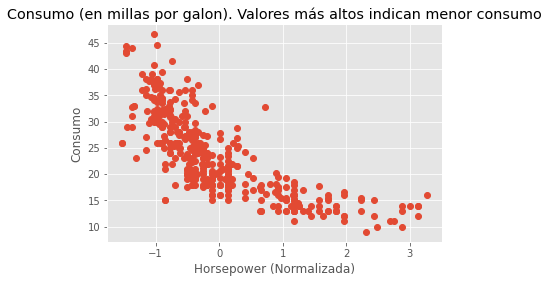

In [3]:

def load_dataset(column='Horsepower'):
    url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
    column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']
    assert column in column_names, f"La columna para la variable independiente debe ser una de las siguientes: {column_names}"
    dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)
    dataset = dataset.dropna()
    dataset = dataset.sort_values(by=column)
    dataset = dataset[[column,"MPG"]]
    dataset = np.array(dataset)
    x,y=dataset[:,0:-1],dataset[:,-1:]
    return x,y

column = "Horsepower"
x,y=load_dataset(column=column)

# cantidad de ejemplos y dimensiones
n,d_in=x.shape
_,d_out=y.shape

print("Información del conjunto de datos:")
print(f"Ejemplos: {n}")
print(f"Variables de entrada: {d_in} ({column})")
print(f"Variables de salida: {d_out} (MPG)")

# Normalizo las variables de entrada
for i in range(d_in):
    x[:,i]=(x[:,i]-x[:,i].mean())/x[:,i].std()

plt.plot(x,y,"o")
plt.xlabel(column+" (Normalizada)")
plt.ylabel("Consumo")
plt.title("Consumo (en millas por galon). Valores más altos indican menor consumo")
plt.show()

# Modelo de red neuronal no lineal


Al ser un problema no lineal, se ve que claramente que un modelo de regresión lineal tendrá problemas para realizar predicciones. A continuación definimos una red de 2 capas con algunas activaciones no lineales para modelar el problema.

No obstante, podés quitarle capas al modelo y dejar una sola sin activaciones para probar un modelo lineal y comparar cuantitativamente las ventajas de un modelo no lineal, evaluando la diferencia entre el MAE/MSE de ambos modelos. 

Recordá que si dejás una sola capa, la misma es tanto la última como la primera, y entonces debe incluir el input_shape, pero no tener función de activación.


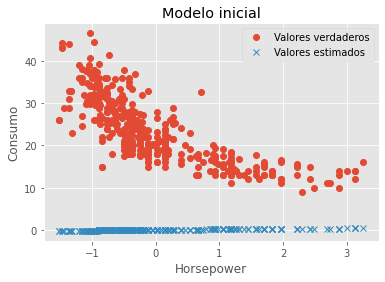

Entrenando....
MSE final: 18.80941390991211
MAE final: 3.236747980117798


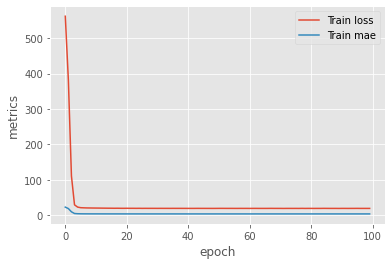

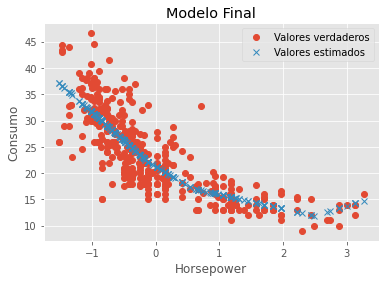

In [26]:
# Creo un modelo Red Neuronal 
modelo = keras.Sequential([
    # input_shape solo en la primer capa
    # Capa con 2 salidas, activación relu
    keras.layers.Dense(8,input_shape=(d_in,), activation="relu"),
    # Capa con 2 salidas, activación tanh
    # keras.layers.Dense(4, activation="tanh" ),
    #la ultima capa si o si tiene que tener tantas salidas como valores a predecir
    keras.layers.Dense(d_out, )])

# visualización del modelo inicial (si hay solo 2 variables de entrada)
if d_in==1:
    rnutil.plot_regression1D(modelo,x,y,title=f"Modelo inicial",xlabel=column,ylabel="Consumo")


modelo.compile(
  optimizer=keras.optimizers.SGD(learning_rate=0.001), 
  loss='mse', 
  # metricas para ir calculando en cada iteracion o batch 
  # Agregamos el accuracy del modelo
  metrics=['mae'], 
)

# Entrenamiento del modelo
print("Entrenando....")
history = modelo.fit(x,y,epochs=100,batch_size=16,verbose=False)
rnutil.plot_training_curves(history)

final_mse = history.history["loss"][-1]
final_mae = history.history["mae"][-1]
print(f"MSE final: {final_mse}")
print(f"MAE final: {final_mae}")

# visualización del modelo final (si hay solo 2 variables de entrada)
if d_in==1:
    rnutil.plot_regression1D(modelo,x,y,title=f"Modelo Final",xlabel=column,ylabel="Consumo")